# <span style="color:red"> Lezione 12</span>
## <span style="color:green"> Esercizio 12.1 </span>



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2022-08-29 19:19:03.292050: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-29 19:19:03.296606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 19:19:03.296621: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) #sono le immagini 28x28
print('Y_train shape:', Y_train.shape) #sono le label
print()
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


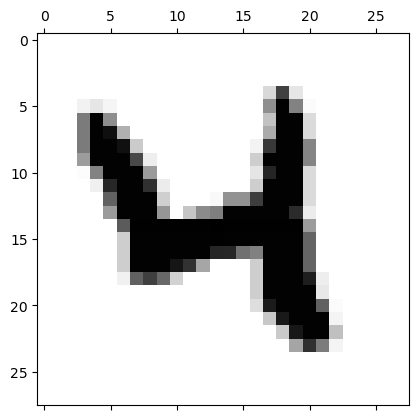

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [4]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

#alla fine serve una softmax per prendere solo un dato su 10

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [6]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(optim):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optim,
                  metrics=['acc'])
    return model


print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


## <span style="color:blue"> Model with stocastic gradient descent </span>

In [7]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model(SGD())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2022-08-29 19:19:21.778593: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-29 19:19:21.778614: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-29 19:19:21.778628: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (claudio-HP-250-G8-Notebook-PC): /proc/driver/nvidia/version does not exist
2022-08-29 19:19:21.778803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7280 - acc: 0.7886 - val_loss: 0.3028 - val_acc: 0.9178
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3727 - acc: 0.8941 - val_loss: 0.2340 - val_acc: 0.9324
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3016 - acc: 0.9159 - val_loss: 0.1969 - val_acc: 0.9423
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - acc: 0.9276 - val_loss: 0.1720 - val_acc: 0.9478
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2301 - acc: 0.9351 - val_loss: 0.1573 - val_acc: 0.9499
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2069 - acc: 0.9417 - val_loss: 0.1430 - val_acc: 0.9544
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1882 - acc: 0.9471 - val_loss: 0.1303 - val_acc: 0.9581
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - los

313/313 [==============================] - 0s 1ms/step - loss: 0.0767 - acc: 0.9749

Test loss: 0.07674438506364822
Test accuracy: 0.9749000072479248


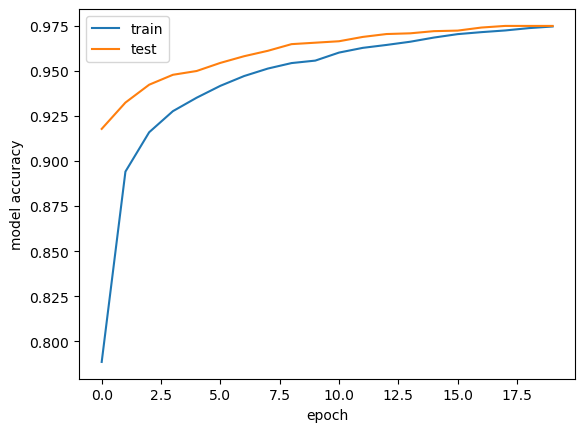

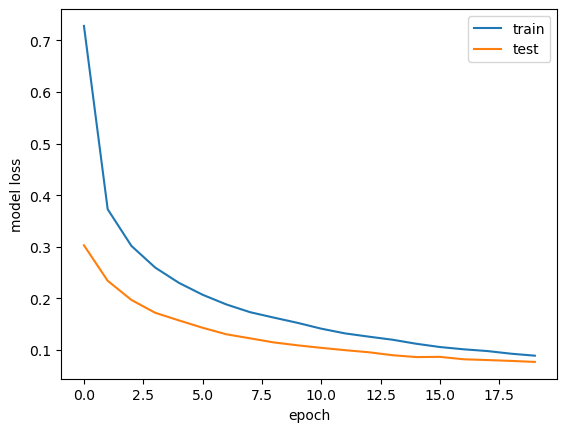

In [8]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 0s 774us/step


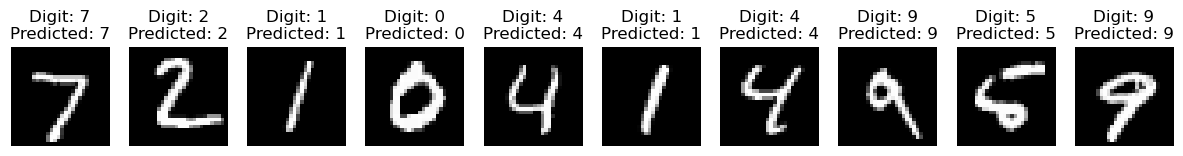

In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In 20 epoche ho ottenuto una buona loss e il training è stato sufficiente per riconoscere correttamente tutte le cifre dell'immagine di test

## <span style="color:blue"> Model with adagrad </span>

Adesso cambio optimizer, proverò ad usare adagrad.

In [10]:
#MAKING RIGHT DATAS (multiple instances of categorical messes things up)

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [11]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model(Adagrad())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3434 - acc: 0.5982 - val_loss: 0.6776 - val_acc: 0.8594
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7483 - acc: 0.7862 - val_loss: 0.4687 - val_acc: 0.8923
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5989 - acc: 0.8273 - val_loss: 0.3908 - val_acc: 0.9037
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5281 - acc: 0.8483 - val_loss: 0.3510 - val_acc: 0.9099
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4853 - acc: 0.8624 - val_loss: 0.3246 - val_acc: 0.9151
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4519 - acc: 0.8712 - val_loss: 0.3052 - val_acc: 0.9198
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4279 - acc: 0.8787 - val_loss: 0.2911 - val_acc: 0.9232
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

313/313 [==============================] - 0s 1ms/step - loss: 0.2094 - acc: 0.9405

Test loss: 0.20942136645317078
Test accuracy: 0.940500020980835


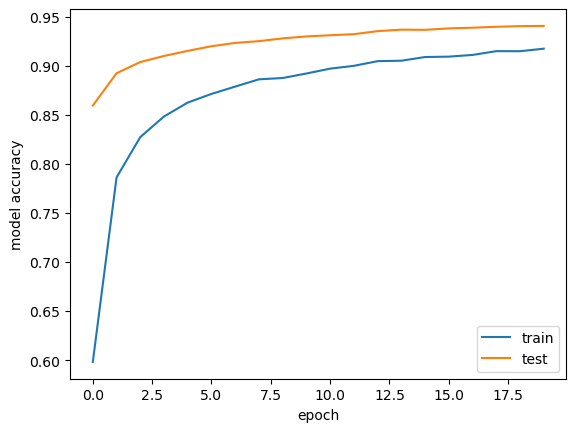

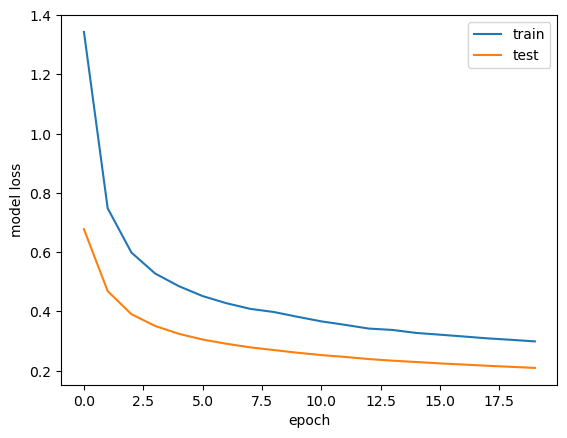

313/313 [==============================] - 0s 730us/step


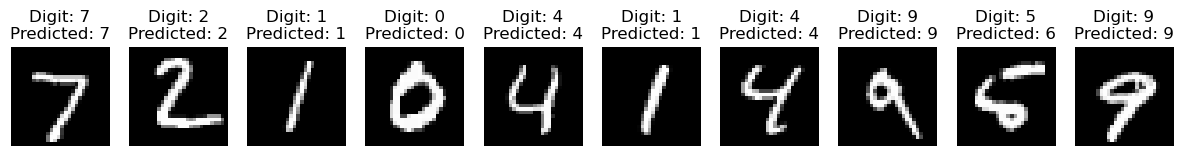

In [12]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

A parità di epoche, adagrad non ha ottenuto risultati buoni come quelli della simulazione precedente, la loss infatti rimane notevolmente più alta, e la loss del set di training è più alta di quella del set di test. Servirebbero più epoche per ottenere risultati paragonabili.

## <span style="color:blue"> Model with Adam </span>

Adesso uso Adam come optimizer.

In [13]:
#MAKING RIGHT DATAS (multiple instances of categorical messes things up)

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [14]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model(Adam())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - acc: 0.9183 - val_loss: 0.1061 - val_acc: 0.9676
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1203 - acc: 0.9647 - val_loss: 0.0985 - val_acc: 0.9680
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - acc: 0.9740 - val_loss: 0.0750 - val_acc: 0.9782
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0672 - acc: 0.9800 - val_loss: 0.0824 - val_acc: 0.9776
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - acc: 0.9837 - val_loss: 0.0797 - val_acc: 0.9779
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - acc: 0.9862 - val_loss: 0.0737 - val_acc: 0.9817
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0396 - acc: 0.9880 - val_loss: 0.0889 - val_acc: 0.9791
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

313/313 [==============================] - 0s 1ms/step - loss: 0.1389 - acc: 0.9814

Test loss: 0.13892868161201477
Test accuracy: 0.9814000129699707


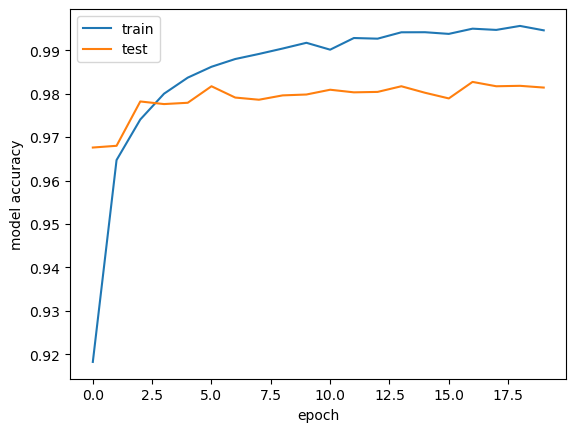

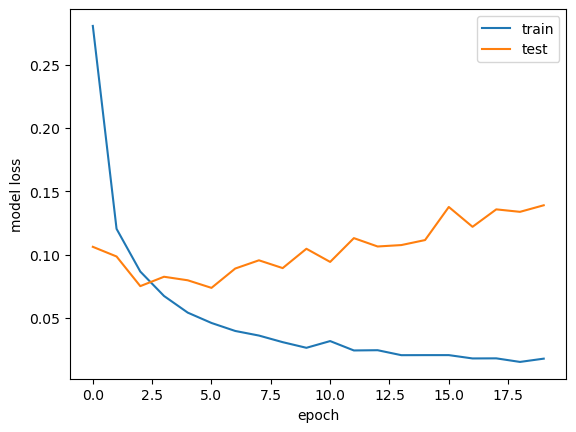

313/313 [==============================] - 0s 720us/step


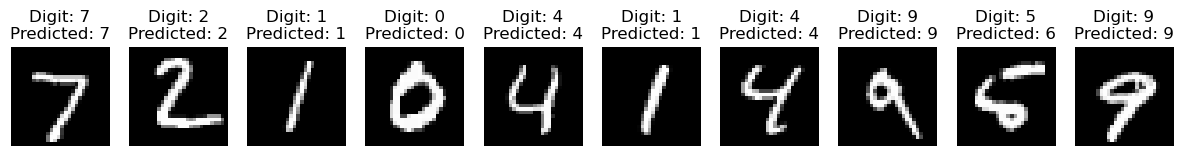

In [15]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Nel caso di Adam, la loss è molto minore che negli altri due casi, si arriva infatti ad eccedere notevolmente rispetto alla loss del set di test. Tuttavia, a differenza della sthocastic gradient descent, in questo caso il neural network non identifica correttamente una delle cifre qui sopra.